# <center> <span style="color:purple"> Census Income classification </span>
### <span style="color:darkblue"> Author </span> 
<span style="color:black"> Leidy Alfonso, lpalfonsoa@gmail.com </span> 

### <span style="color:darkblue"> Objetive:  </span>  
+ Understand the Dataset & cleanup deeply. 

+ Employ classification models to accurately predict outcomes based on a given set of features

+ Identify salient feature values that correlate with an income exceeding $50K by conducting a data-driven analysis

<span style="color:darkblue"> Description:  </span>  

<p style="text-align: justify;"> Creating prediction models enables a thorough comprehension of a nation's population and the various economic factors at work. Governments can proactively identify opportunities for improvement by recognizing these elements, promoting national growth and development. </p>


<span style="color:darkblue"> Acknowledgements:  </span>  
This dataset has been referred from Kaggle.

#### <span style="color:black"> Import libraries </span> 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

### Descriptive analysis
#### <span style="color:black"> Load data </span> 

In [2]:
df = pd.read_csv("../Data_sets/adult.csv")
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))
df.head()

Rows: 32561 Columns: 15


age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

#### <span style="color:black"> Understand and clean data </span> 

In [3]:
#save columns name
col = df.columns 
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;"> No null-type data is observed; however, numerous variables are of object type, and missing data denoted by "?" values are observed in the dataset's head. Hence, a thorough examination of values within the data table will be conducted to clean and obtain an optimal dataset for classification modeling. Initially, the presence of null values will be verified. </p>

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [6]:
for column in col:
  if (df[column].dtype == 'object' ):
    display(df[column].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Male      21790
Female    10771
Name: sex, dtype: int64

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

<=50K    24720
>50K      7841
Name: income, dtype: int64

<span style="color:darkblue"> Observations: </span>  
The columns with missing data and the corresponding count of missing values are summarized in the following table:

|     Feature       | Frecuency missing values |
|:-----------------:|:-----------------------:|
|    workclass      |          1836           |
|    occupation     |          1843           |
| native.country    |          583            |

Now, the integer-type variables will be checked to ensure the absence of garbage, missing data, or other undesirable imperfections.

In [7]:
for column in col:
  if (df[column].dtype == 'int64' ):
    display(df[column].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 94, dtype: int64

<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;"> No missing data was found in the following features: 'age', 'fnlwgt', 'education', 'education.num', 'marital.status', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', and 'income'. These variables are complete and contain all the required information. </p>

<p style="text-align: justify;"> Given the considerable number of missing values present in the dataset, it is not feasible to simply remove the affected data instances. Consequently, the imputation process will be applied to address these missing values effectively. Through imputation techniques, the missing data will be replaced with estimated values based on relevant patterns and statistical inference, ensuring the preservation of the dataset's integrity and maximizing the utility of the available information for subsequent analysis and modeling purposes. </p>

In [8]:
data=df.copy() #Making a copy that does not alter the original dataset
data[data == '?'] = np.nan #Change ? by NaN
print(data.info())

for column in ['workclass', 'occupation', 'native.country']:
    data[column].fillna(data[column].mode()[0], inplace=True) #imputation technique

print(data.info()) #Verify values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns

#### <span style="color:black"> Feature engineering  </span> 

In [9]:
col=data.columns
print(col)

# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [10]:
def group_by_age(x):
    x = abs(int(x))
    if( 0 < x < 19 ):
        return "Less than 19"
    elif( 18 < x < 31 ):
        return "19-30"
    elif( 30 < x < 41 ):
        return "31-40"
    elif( 40 < x < 51 ):
        return "41-50"
    elif( 50 < x < 61 ):
        return "51-60"
    elif( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

age_group = ['Less than 19', '19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
data['age_group'] = data['age'].apply(group_by_age) 
data.insert(loc= 1 , column= 'age_group', value= data.pop('age_group')) #Move to second column

In [11]:
data['education'] = data['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'School')
data["marital.status"] = data["marital.status"].replace(['Divorced','Separated','Widowed'], 'Other')
data["marital.status"] = data["marital.status"].replace('Never-married', 'Single')
data["marital.status"] = data["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

In [12]:
# Checking the counts of label categories
income = data['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

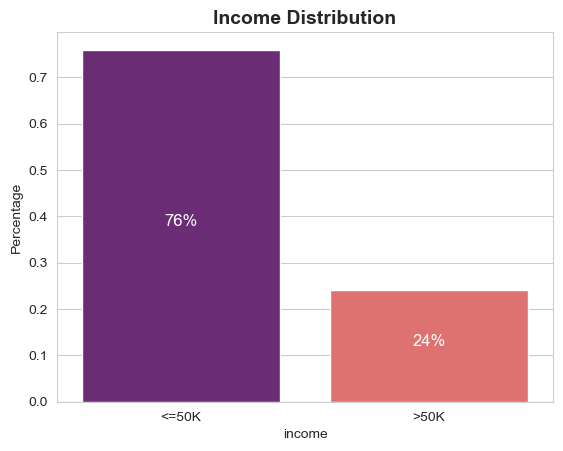

In [13]:
sns.set_style("whitegrid")
plt.title('Income Distribution', fontsize=14, fontweight='bold')
percentage = data['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'income', y = 'Percentage', data = percentage, palette='magma')

for ii in ax.patches:
    width = ii.get_width()
    height = ii.get_height()
    x, y = ii.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*0.5), ha='center', fontsize=12, color='white')

<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;" >The dataset exhibits an imbalance, as the dependent feature 'income' portrays a distribution where 75.92% of the values correspond to incomes less than 50k, while 24.08% of the values represent incomes exceeding 50k. This disparity in the distribution highlights the need to consider appropriate techniques for handling imbalanced data during subsequent analyses and modeling endeavors. </p>

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

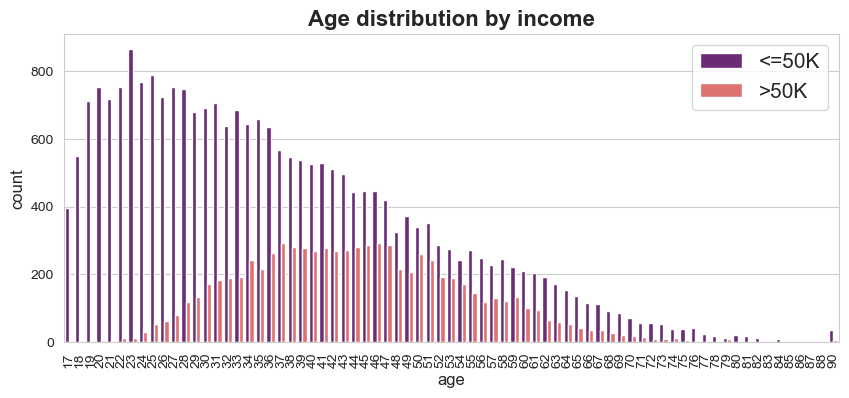

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
column = 'age'
sns.countplot(x=data[column], palette='magma', hue='income', data=data);
plt.title('Age distribution by income', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10,rotation = 90)
plt.yticks(fontsize=10)
plt.xlabel(column, fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(fontsize=15, loc= 'upper right')

Text(0.5, 1.0, 'Age groups by income')

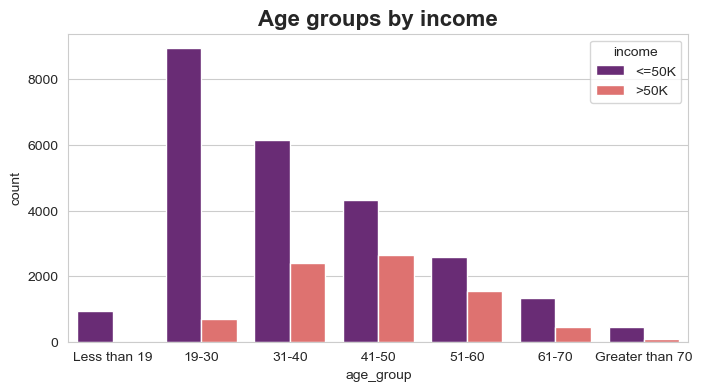

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x=data['age_group'], hue=data['income'], palette='magma', order=age_group)
plt.title('Age groups by income', fontsize=16, fontweight='bold')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education.num'}>],
       [<Axes: title={'center': 'capital.gain'}>,
        <Axes: title={'center': 'capital.loss'}>,
        <Axes: title={'center': 'hours.per.week'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

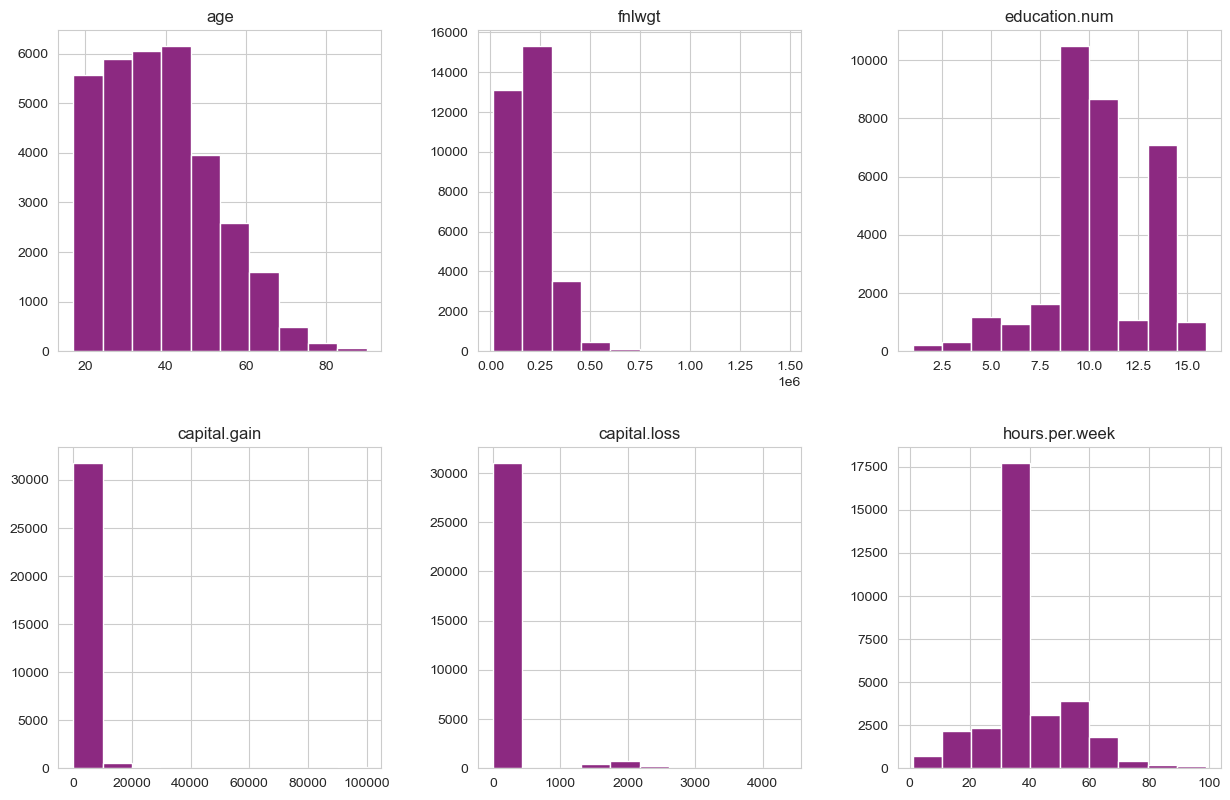

In [17]:
#numeric data
# Get the Magma colormap
cmap = plt.get_cmap('magma')
# Select a color from the colormap
color_magma = cmap(0.4)
data.hist(figsize=(15,15), layout=(3,3), sharex=False, color = color_magma)

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education.num     Axes(0.672059,0.653529;0.227941x0.226471)
capital.gain         Axes(0.125,0.381765;0.227941x0.226471)
capital.loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours.per.week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

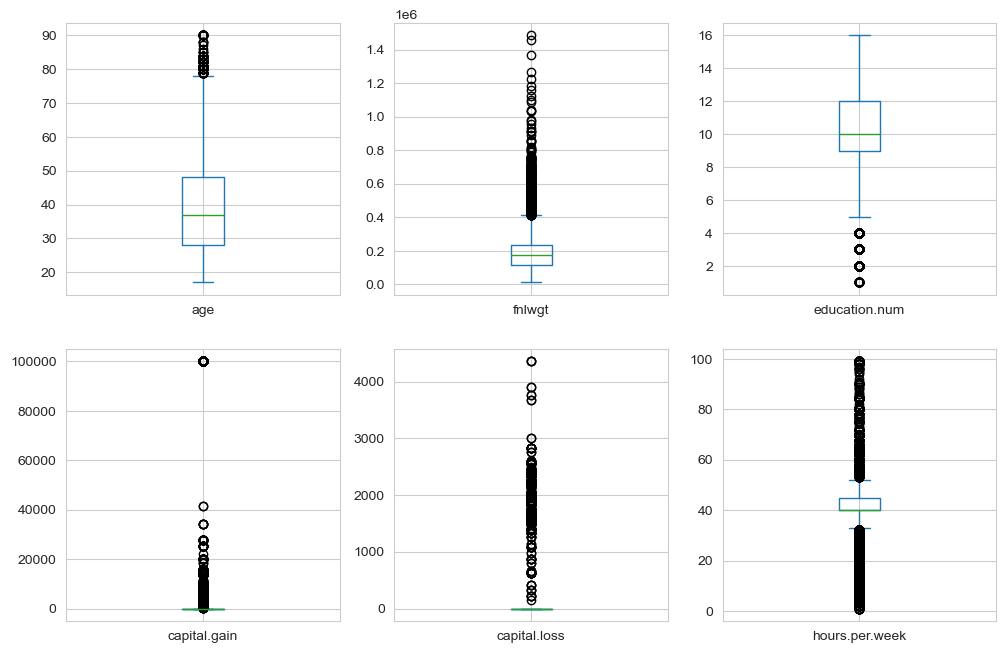

In [18]:
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

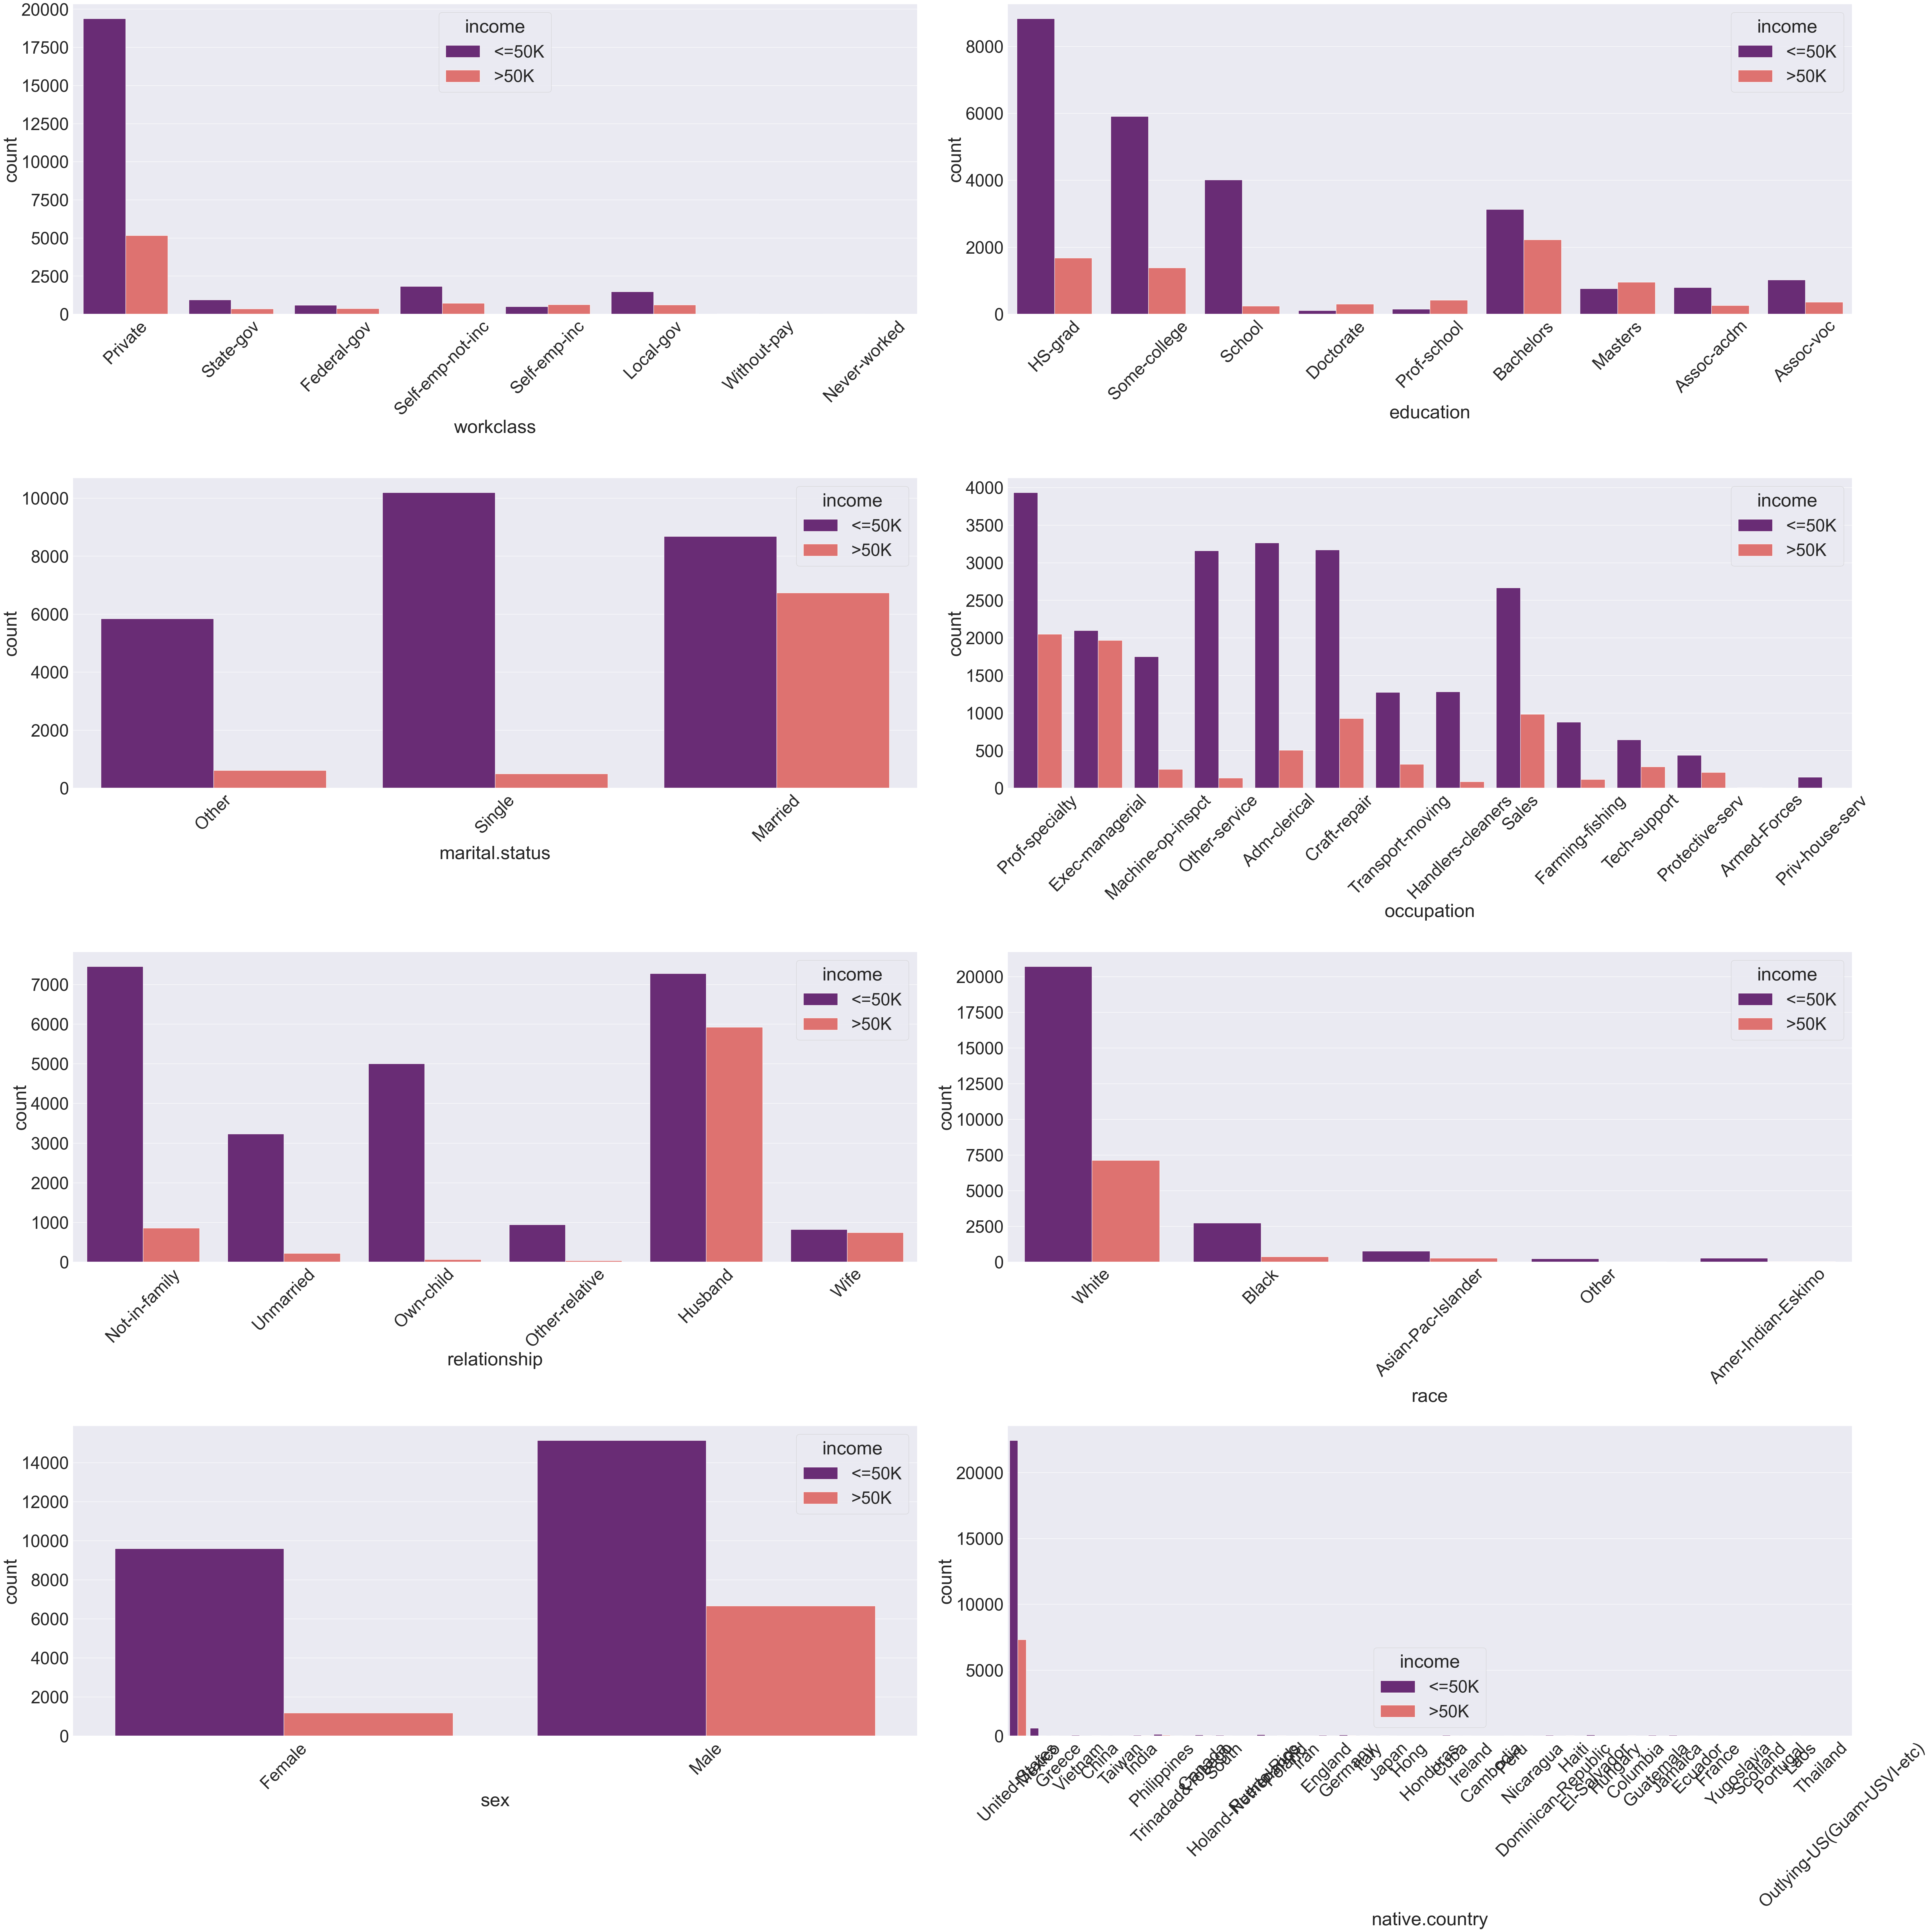

In [19]:
#cathegorical data
sns.set(font_scale=4)
plt.figure(figsize=(70,70)) 
i=1
for column in cat_features:
  plt.subplot(4,2,i)
  sns.countplot( x=data[column], palette='magma', hue='income', data=data )
  plt.xticks(rotation=45)
  i=i+1
plt.tight_layout()


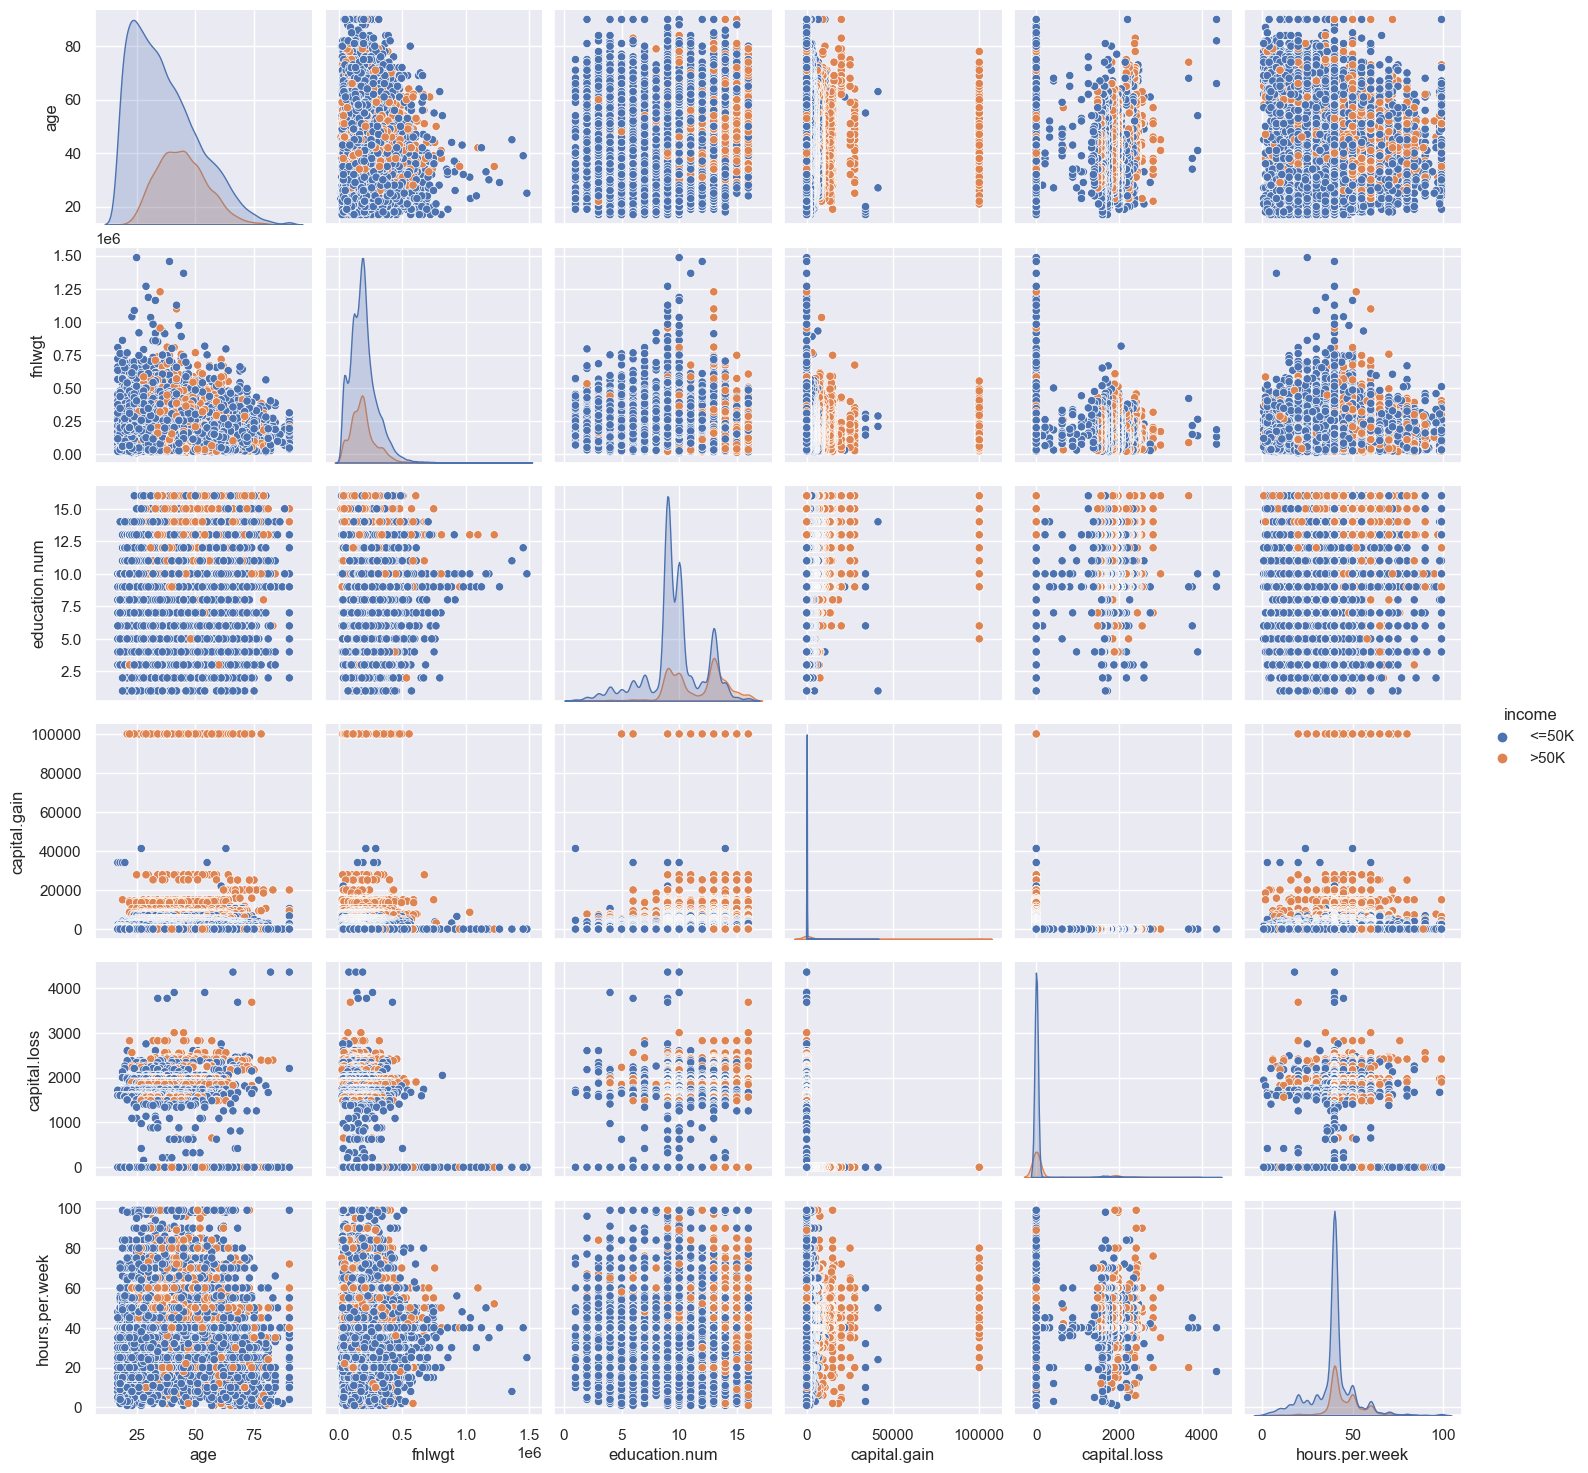

In [36]:
sns.set(rc={'figure.figsize':(20,10)})
sns.pairplot(data, hue = 'income') 

In [21]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

<span style="color:darkblue"> Observations: </span>  
<p style="text-align: justify;" > The majority of individuals in this dataset are characterized as young, Caucasian males with a high school education level. They typically have 9 to 10 years of formal education and work a standard 40-hour workweek. </p>

<p style="text-align: justify;" >  Individuals with incomes below 50K predominantly fall within the age range of 20 to 40 years. Conversely, higher incomes exceeding 50K are primarily observed among individuals aged between 30 and 50 years. </p>

<p style="text-align: justify;" >  In order to enhance the performance of the classification models, it is necessary to address the disparate range of values across the features within the dataset. To mitigate the potential impact of this variation, a data scaling procedure will be employed. By scaling the data, the values of each feature will be normalized, ensuring a consistent magnitude and eliminating potential bias arising from the original ranges.  </p>

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
data_new = data.copy()
data_income = data['income'] 
data_new = data_new.drop(['income', 'age_group'], axis=1)

#Estandarizando info numerica
sc = StandardScaler()
# get numeric data
num_d = data_new.select_dtypes(exclude=['object'])
# update the cols with their normalized values
data_new[num_d.columns] = sc.fit_transform(num_d)

#Encondando las variables catgoricas
le = LabelEncoder()
for column in cat_features:
  data_new[column] = le.fit_transform(data_new[column])
data_income = data_income.map({'<=50K': 0, '>50K': 1})
data_new = pd.DataFrame(data_new)

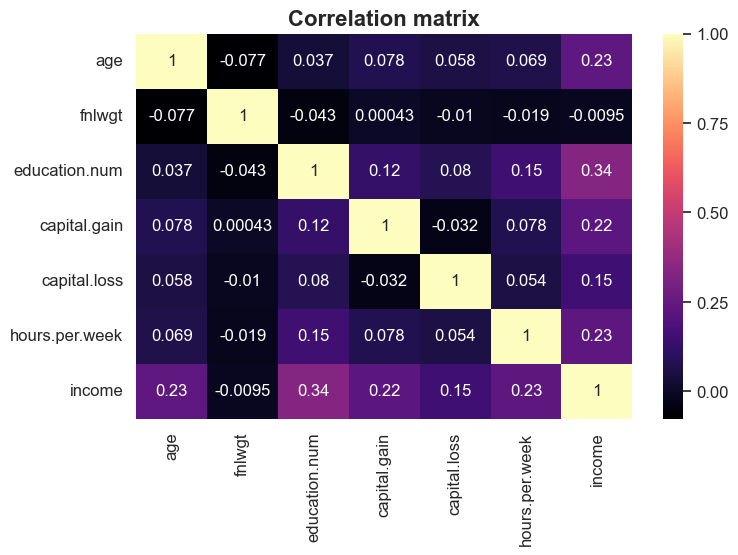

In [35]:
plt.figure(figsize=(8, 5))
plt.title("Correlation matrix", fontweight='bold', fontsize=16)
heatmap = sns.heatmap(pd.concat([data_new, data_income], axis=1)[numeric_features].corr(numeric_only=True), cmap='magma', annot=True, annot_kws={"fontsize": 12}, cbar_kws={"ticks": [0, 0.25, 0.5, 0.75, 1]})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Access the color bar object and modify the label font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # Adjust the fontsize to your desired size

plt.show()

<span style="color:darkblue"> Observations: </span>  

<p style="text-align: justify;" > Based on the correlation heatmap analysis, it is evident that the dependent feature 'income' exhibits strong correlations with several other variables. Notably, there is a significant correlation between 'income' and attributes such as age, years of education, capital gain, and hours worked per week. These findings suggest that these factors play a substantial role in determining an individual's income level within the dataset. </p>

### <span style="color:black"> Classification models </span> 
#### <span style="color:black"> Logistic regression </span> 
Given the presence of a categorical variable to be predicted, it is logical to employ Logistic Regression as our modeling approach. 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_new, data_income, test_size=0.3, random_state=123)

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
data_pedict = model.predict(X_test)
print("Accuracy", lr.score(X_train, y_train))
print("Accuracy", lr.score(X_test, y_test))

Accuracy 0.8411284661284661
Accuracy 0.8428703040229297


C:\Users\paolo\anaconda3\envs\study_case\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
"""Based on the error caused by non-convergence, an increased number of iterations was attempted 
considering the completion of engineered features, pre-processing, and data scaling. Subsequently,
as convergence was achieved, no further alternative methods were pursued.
"""
lr = LogisticRegression(solver='lbfgs', max_iter=500)
model = lr.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

print("Accuracy", lr.score(X_train, y_train))
print("Accuracy", lr.score(X_test, y_test))
print(classification_report(y_test, y_pred_lr))

Accuracy 0.8402070902070902
Accuracy 0.8423584809089979
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7415
           1       0.73      0.54      0.62      2354

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



#### <span style="color:black"> Graient Boosting </span> 

In [46]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train,y_train)
y_pred_gbm = gbm_model.predict(X_test)
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print(classification_report(y_test, y_pred_gbm))

GBM  Train Score: 0.8674973674973675
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7415
           1       0.79      0.59      0.68      2354

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



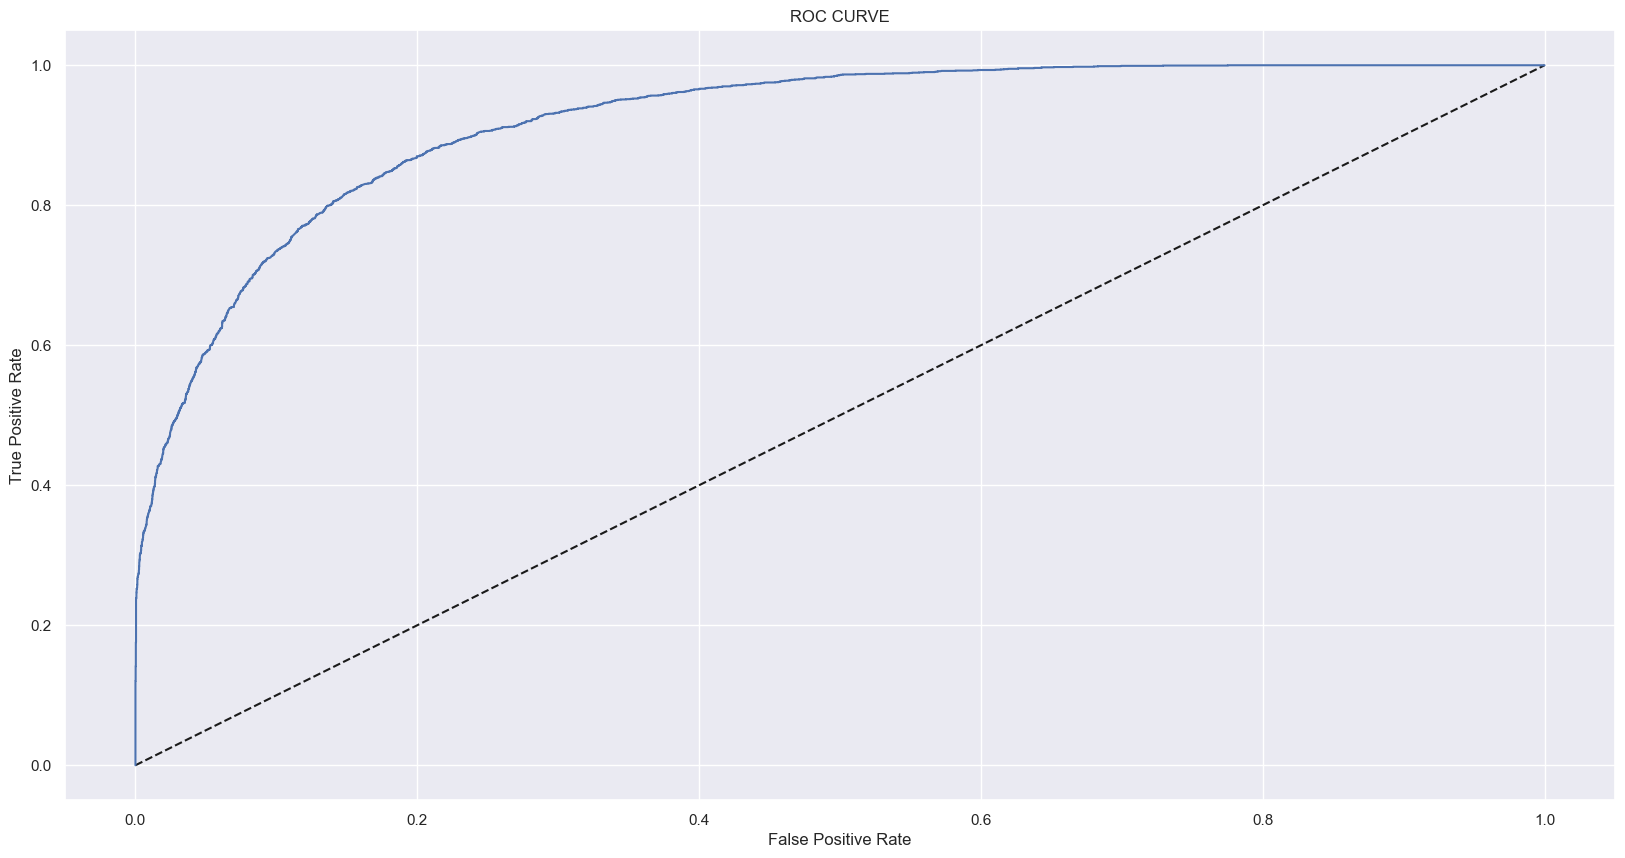

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

In [49]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7415
           1       0.74      0.53      0.62      2354

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



In the pursuit of optimal performance in the Support Vector Machine (SVM) model, an investigation was conducted involving the evaluation of various kernels. The primary objective was to identify the most suitable kernel that achieves the highest accuracy score while maintaining simplicity. After thorough experimentation and rigorous evaluation, it was determined that the linear kernel exhibited the highest accuracy among the tested kernels. 